<a href="https://colab.research.google.com/github/gomescheelsy03/Repo2/blob/main/Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Cell 1: Import Libraries
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization styles
sns.set(style="whitegrid")


In [3]:
# Cell 2: API Configuration
API_KEY = "fNroQ326uA6Hu07BJJynNJ0mJSwVYCzmtGt36ywC9ySdPEHf8m"  # Replace with your Petfinder API key
API_SECRET = "tOmKKCxygroTgyU0L9nO4hEr69WofISRPozPA5aK"  # Replace with your Petfinder API secret
BASE_URL = "https://api.petfinder.com/v2/"
TOKEN = None
TOKEN_EXPIRY = None


In [4]:
# Cell 3: Authentication and Token Management
def get_auth_token():
    global TOKEN, TOKEN_EXPIRY
    if TOKEN and datetime.now() < TOKEN_EXPIRY:
        return TOKEN
    url = f"{BASE_URL}oauth2/token"
    data = {
        "grant_type": "client_credentials",
        "client_id": API_KEY,
        "client_secret": API_SECRET
    }
    response = requests.post(url, data=data)
    response_data = response.json()
    TOKEN = response_data["access_token"]
    TOKEN_EXPIRY = datetime.now() + timedelta(seconds=response_data["expires_in"])
    return TOKEN


In [5]:
# Cell 4: Basic API Request Function with Error Handling
def make_api_request(endpoint, params=None):
    token = get_auth_token()
    headers = {"Authorization": f"Bearer {token}"}
    try:
        response = requests.get(f"{BASE_URL}{endpoint}", headers=headers, params=params)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"Request failed: {e}")
        return None


In [6]:
# Cell 5: Enhanced API Calls
def search_pets(criteria):
    return make_api_request("animals", params=criteria)

def get_animal_types():
    return make_api_request("types")

def get_organizations(location):
    return make_api_request("organizations", params={"location": location})

def get_animal_by_id(animal_id):
    return make_api_request(f"animals/{animal_id}")

def get_recently_added_pets():
    return make_api_request("animals", params={"sort": "recent"})


In [7]:
# Cell 6: Data Processing
def process_data(data):
    if data and 'animals' in data:
        df = pd.DataFrame(data['animals'])
        return df
    else:
        return pd.DataFrame()  # Return an empty DataFrame if there's no data


In [8]:
# Cell 7: Data Visualization
def visualize_data(df, column, title):
    if not df.empty:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column)
        plt.title(title)
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No data to visualize.")


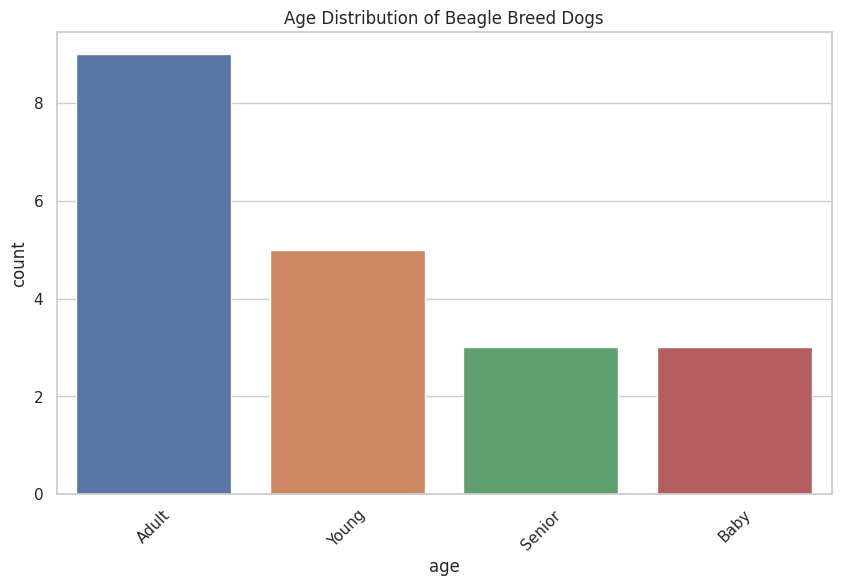

{'types': [{'name': 'Dog', 'coats': ['Hairless', 'Short', 'Medium', 'Long', 'Wire', 'Curly'], 'colors': ['Apricot / Beige', 'Bicolor', 'Black', 'Brindle', 'Brown / Chocolate', 'Golden', 'Gray / Blue / Silver', 'Harlequin', 'Merle (Blue)', 'Merle (Red)', 'Red / Chestnut / Orange', 'Sable', 'Tricolor (Brown, Black, & White)', 'White / Cream', 'Yellow / Tan / Blond / Fawn'], 'genders': ['Male', 'Female'], '_links': {'self': {'href': '/v2/types/dog'}, 'breeds': {'href': '/v2/types/dog/breeds'}}}, {'name': 'Cat', 'coats': ['Hairless', 'Short', 'Medium', 'Long'], 'colors': ['Black', 'Black & White / Tuxedo', 'Blue Cream', 'Blue Point', 'Brown / Chocolate', 'Buff & White', 'Buff / Tan / Fawn', 'Calico', 'Chocolate Point', 'Cream / Ivory', 'Cream Point', 'Dilute Calico', 'Dilute Tortoiseshell', 'Flame Point', 'Gray & White', 'Gray / Blue / Silver', 'Lilac Point', 'Orange & White', 'Orange / Red', 'Seal Point', 'Smoke', 'Tabby (Brown / Chocolate)', 'Tabby (Buff / Tan / Fawn)', 'Tabby (Gray / Bl

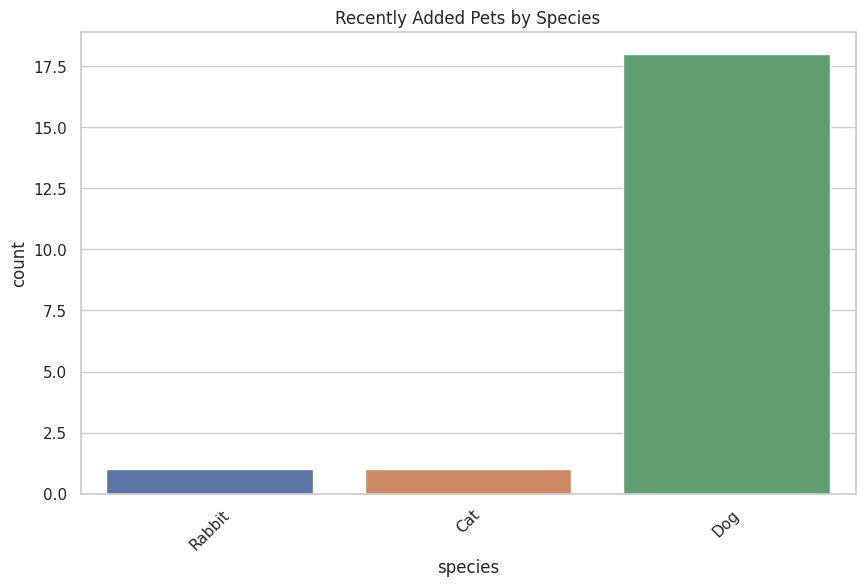

In [10]:
# Cell 8: Main Function
def main():
    # Example: Search for Beagle breed dogs
    beagle_data = search_pets({"type": "dog", "breed": "Beagle"})
    beagle_df = process_data(beagle_data)
    visualize_data(beagle_df, 'age', 'Age Distribution of Beagle Breed Dogs')

    # Example: Get animal types
    animal_types = get_animal_types()
    print(animal_types)

    # Example: Get organizations in a location
    organizations = get_organizations("10001")  # New York ZIP code
    print(organizations)

    # Example: Get details of a specific animal by ID
    animal_details = get_animal_by_id(123456)  # Replace with a valid animal ID
    print(animal_details)

    # Example: Get recently added pets
    recent_pets = get_recently_added_pets()
    recent_pets_df = process_data(recent_pets)
    visualize_data(recent_pets_df, 'species', 'Recently Added Pets by Species')

if __name__ == "__main__":
    main()
